In [102]:
# import importnt libraries such as numpy , pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [103]:
#read the dataset from dat08mm bucket and the file name is citrus.
df = pd.read_csv('s3://day08mm/cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [104]:
#laast 5 entry of the dataset
df.tail()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,418,976,C,NaN,19358,F,NaN,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


In [105]:
#shape means 418 data and the 20 features.
df.shape


(418, 20)

In [106]:
print(df.dtypes)# so here we can see that some columns in the oject nd int nd flot data types

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object


In [107]:
#check the nullvalues in the dataset
df.isnull().sum()
#so, there are many null vaues in the dataset.

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [108]:
# For Numerical Type
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

ID                 0
N_Days             0
Age                0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [109]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()
df_num_col = df.select_dtypes(include=(['int64', 'float64'])).columns
for c in df_num_col:
    df[c].fillna(df[c].median(), inplace=True)

df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

ID               0
N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [110]:
df.select_dtypes(include=('object')).isna().sum()

df_cat_col = df.select_dtypes(include=('object')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mode().values[0], inplace=True)# tke the mode of the dataset 
    
df.select_dtypes(include=('object')).isna().sum() # also conforming all the missing values are filled

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64

In [111]:
df['Stage'].value_counts() # predicting column have the 4 stages of the liver cirossis so by the dataset we can say that the liver cirosis present in the 4 stage.

Stage
3.0    161
4.0    144
2.0     92
1.0     21
Name: count, dtype: int64

In [112]:
# Converting Target categories into intigers 1 for Cirrhosis, 0 otherwise(because the 4 stage is the actual conform liver cirosi)
df['Stage'] = np.where(df['Stage'] == 4,1,0)

In [113]:
# replacing catagorical data with intigers.(with the 0 and 1 values )
df['Sex'] = df['Sex'].replace({'M':0, 'F':1})                                # M: 0 , F:1
df['Ascites'] = df['Ascites'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1   
df['Drug'] = df['Drug'].replace({'D-penicillamine':0, 'Placebo':1})          # D-penicillamine : 0, Placebo : 1   
df['Hepatomegaly'] = df['Hepatomegaly'].replace({'N':0, 'Y':1})              # N : 0, Y : 1
df['Spiders'] = df['Spiders'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1
df['Edema'] = df['Edema'].replace({'N':0, 'Y':1, 'S':-1})                    # N : 0, Y : 1, S : -1
df['Status'] = df['Status'].replace({'C':0, 'CL':1, 'D':-1})   

In [114]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,-1,0,21464,1,1,1,1,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,1
1,2,4500,0,0,20617,1,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,0
2,3,1012,-1,0,25594,0,0,0,0,-1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,1
3,4,1925,-1,0,19994,1,0,1,1,-1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,1
4,5,1504,1,1,13918,1,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,0


In [115]:
#description of the dataset which has the MEAN, MEDIAN AND STANDARD DEVIATION OF THE DATASET.
#
df.describe()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,209.500000,1917.782297,-0.325359,0.368421,18533.351675,0.894737,0.057416,0.636364,0.215311,-0.057416,3.220813,350.272727,3.497440,91.279904,1799.144976,120.564067,119.267943,256.866029,10.731100,0.344498
std,120.810458,1104.672992,0.583036,0.482954,3815.845055,0.307260,0.232915,0.481622,0.411530,0.387521,4.407506,193.123893,0.424972,74.485481,1875.121982,49.085094,54.050691,97.024861,1.019587,0.475774
min,1.000000,41.000000,-1.000000,0.000000,9598.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,0.000000
25%,105.250000,1092.750000,-1.000000,0.000000,15644.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.800000,273.000000,3.242500,51.250000,1016.250000,91.000000,95.000000,190.000000,10.000000,0.000000
50%,209.500000,1730.000000,0.000000,0.000000,18628.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,0.000000
75%,313.750000,2613.500000,0.000000,1.000000,21272.500000,1.000000,0.000000,1.000000,0.000000,0.000000,3.400000,347.750000,3.770000,100.750000,1707.750000,135.750000,127.750000,315.500000,11.100000,1.000000
max,418.000000,4795.000000,1.000000,1.000000,28650.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,1.000000


In [116]:
#chek the unique values
df.nunique().sum()
#by seen there are 2703 uniue values for 20 features


2703

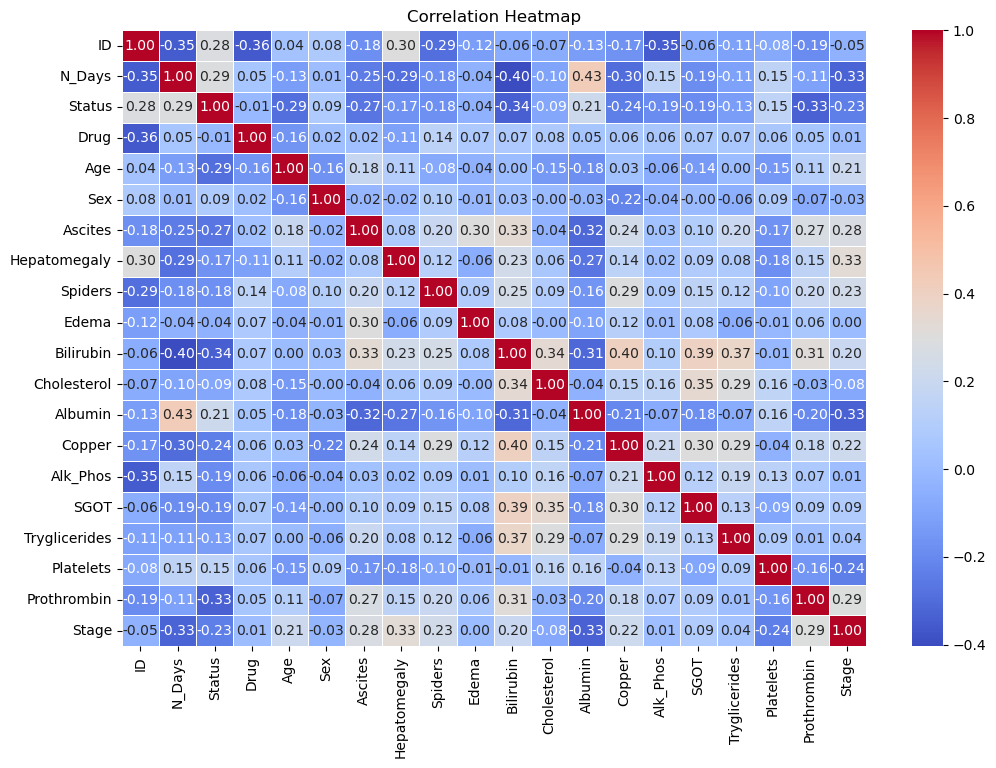

In [117]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create a correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [118]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [119]:
#import library to sdk use in boto3
import os
import boto3
import re
import sagemaker

role = sagemaker.get_execution_role()   #retrive the IAM role 
region = boto3.Session().region_name   #retrive the region name
smclient = boto3.Session().client("sagemaker")     #smclient is creted to intrect with the sagemker to create startpoint and endpoint with alll job creation
bucket = "day08mm"#actual source bucket to perform the task which has the dataset
prefix = ("cirosis") #creting the prefix to save the validaation and test dataset
print (region)# conform the region is perfect by printing

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
us-east-1


SO, from the independent variables we are droping the 'Status','Drug','Sex','Alk_Phos','Edema','Albumin','Platelets', 'N_Days', 'Stage variables becanue they are not corelaed tothe stage of the liver disease so they are not so impoetant to predict the performance.

splitting dataset  into train,70% validation20% and 10% test.also set the target variable name and drop from the x.

In [125]:
train_data, validation_data, test_data = np.split(df.sample(frac=1, random_state=1729),[int(0.7 * len(df)), int(0.9 * len(df))])

pd.concat([train_data["Stage"], train_data.drop(['Status','Drug','Sex','Alk_Phos','Edema','Albumin','Platelets', 'N_Days', 'Stage'], axis=1)], axis=1).to_csv(
 "train.csv", index=False, header=False
)  
pd.concat([validation_data["Stage"], validation_data.drop(['Status','Drug','Sex','Alk_Phos','Edema','Albumin','Platelets', 'N_Days', 'Stage'], axis=1)], axis=1).to_csv(
    "validation.csv", index=False, header=False)
pd.concat([test_data["Stage"], test_data.drop(['Status','Drug','Sex','Alk_Phos','Edema','Albumin','Platelets', 'N_Days', 'Stage'], axis=1)], axis=1).to_csv(
 "test.csv", index=False, header=False
)


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [126]:
## Assign the target variable(wnat to predict variable) and the independent variables (features)for the traning and testing set.
train_y = train_data["Stage"]
train_X = train_data.drop(['Status','Drug','Sex','Alk_Phos','Edema','Albumin','Platelets', 'N_Days', 'Stage'], axis=1)
test_y = test_data["Stage"]
test_X = test_data.drop(['Status','Drug','Sex','Alk_Phos','Edema', 'N_Days','Albumin','Platelets','Stage'], axis=1)


In [127]:
# uploading train and validation in s3 bucket
boto3.Session().resource("s3").Bucket(bucket).Object(
 os.path.join(prefix, "train/train.csv")
).upload_file("train.csv")
boto3.Session().resource("s3").Bucket(bucket).Object(
 os.path.join(prefix, "validation/validation.csv")
).upload_file("validation.csv")

In [128]:
# model XGBoost perform without tuning.
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score   

# Train-Test Split
X = df.drop(['Status','Drug','Sex','Alk_Phos','Edema','Albumin','Platelets','N_Days', 'Stage'], axis=1)  
y = df['Stage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Model Training
xg_cls = xgb.XGBClassifier(objective='binary:logistic', seed=42)
xg_cls.fit(X_train, y_train)

#  Model Evaluation  predicted labels (y_pred) with the true labels (y_test).
y_pred = xg_cls.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7142857142857143


In the hp tuning job we generate the unique job name and time,during the configration learning rate (eta),set the minimum sum of the weight in chid with min 1 and max 10 

In [129]:
from time import gmtime, strftime, sleep

tuning_job_name = "xgboost-tuningjob-" + strftime("%d-%H-%M-%S", gmtime())   # generating unique job name with time
print(tuning_job_name)

#tuning job
tuning_job_config = {
    "ParameterRanges": {
        "CategoricalParameterRanges": [],
        "ContinuousParameterRanges": [
            {
                "MaxValue": "1",
                "MinValue": "0",
                "Name": "eta",  #the work of the eta is to find the balance between the model traning speed and accuracy    
            },                  #learning rate parameater each iteration of traning with minimal loss function.
            {
                "MaxValue": "10",
                "MinValue": "1",
                "Name": "min_child_weight",   # node (reg)which is help to reduce noice in tree to do not generate more trees to overfit model. 
            },
            {
                "MaxValue": "2",
                "MinValue": "0",
                "Name": "alpha", # alpha is l1 regularization which help overcome the overfitting to fit data well.   
            },
        ],
        "IntegerParameterRanges": [
            {
                "MaxValue": "10",
                "MinValue": "1",
                "Name": "max_depth",   #depth of the tree or node in nn to reduce overfiting.
            }
        ],
    },
    "ResourceLimits": {"MaxNumberOfTrainingJobs": 10, "MaxParallelTrainingJobs": 3}, 
    "Strategy": "Bayesian",
    "HyperParameterTuningJobObjective": {"MetricName": "validation:accuracy", "Type": "Maximize"},
}##mximum trning job is 10 which hve too be done nd we run the 3 jobs prarallel.

xgboost-tuningjob-29-10-59-39


In [130]:
from sagemaker.image_uris import retrieve

training_image = retrieve(framework="xgboost", region=region, version="1.5-1")   
# Retrieve XGBoost Docker Image URI
# S3 input paths for training and validation data
s3_input_train = "s3://{}/{}/train".format(bucket, prefix)
s3_input_validation = "s3://{}/{}/validation/".format(bucket, prefix)

# configuration for the SageMaker training job
training_job_definition = {
    "AlgorithmSpecification": {"TrainingImage": training_image, "TrainingInputMode": "File"},    # algorithm and its training image
    "InputDataConfig": [    # input data configuration for training and validation
        {
            "ChannelName": "train",    
            "CompressionType": "None",
            "ContentType": "csv",
            "DataSource": {
                "S3DataSource": {
                    "S3DataDistributionType": "FullyReplicated",
                    "S3DataType": "S3Prefix",
                    "S3Uri": s3_input_train,    
                }
            },
        },
        {
            "ChannelName": "validation",   
            "CompressionType": "None",
            "ContentType": "csv",
            "DataSource": {
                "S3DataSource": {
                    "S3DataDistributionType": "FullyReplicated",
                    "S3DataType": "S3Prefix",
                    "S3Uri": s3_input_validation,   
                }
            },
        },
    ],
    "OutputDataConfig": {"S3OutputPath": "s3://{}/{}/output".format(bucket, prefix)},  
    "ResourceConfig": {"InstanceCount": 1, "InstanceType": "ml.m4.xlarge", "VolumeSizeInGB": 10},   
    "RoleArn": role,   # IAM role 
    "StaticHyperParameters": {    # static hp for the XGBoost
        "eval_metric": "auc",
        "num_round": "100",
        "objective": "binary:logistic",
        "rate_drop": "0.3",
        "tweedie_variance_power": "1.4",
    },
    "StoppingCondition": {"MaxRuntimeInSeconds": 43200},    #  stopping conditions for the training job
}

In [131]:
# creating the hp tuning job
smclient.create_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=tuning_job_name,
    HyperParameterTuningJobConfig=tuning_job_config,
    TrainingJobDefinition=training_job_definition,
)

{'HyperParameterTuningJobArn': 'arn:aws:sagemaker:us-east-1:263245924849:hyper-parameter-tuning-job/xgboost-tuningjob-29-10-59-39',
 'ResponseMetadata': {'RequestId': '68c5e68f-294f-425b-b986-9da990a1c920',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '68c5e68f-294f-425b-b986-9da990a1c920',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '130',
   'date': 'Wed, 29 Nov 2023 10:59:45 GMT'},
  'RetryAttempts': 0}}

In [77]:
# status of hp
smclient.describe_hyper_parameter_tuning_job(HyperParameterTuningJobName=tuning_job_name)["HyperParameterTuningJobStatus"]

'InProgress'

In [132]:
# Job name of hp
smclient.describe_hyper_parameter_tuning_job(HyperParameterTuningJobName=tuning_job_name)['HyperParameterTuningJobName']

'xgboost-tuningjob-29-10-59-39'

In [134]:
# run this cell to check current status of hyperparameter tuning job
tuning_job_result = smclient.describe_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=tuning_job_name
)

status = tuning_job_result["HyperParameterTuningJobStatus"]
if status != "Completed":
    print("Reminder: the tuning job has not been completed.")

job_count = tuning_job_result["TrainingJobStatusCounters"]["Completed"]
print("%d training jobs have completed" % job_count)

objective = tuning_job_result["HyperParameterTuningJobConfig"]["HyperParameterTuningJobObjective"]
is_minimize = objective["Type"] != "Maximize"
objective_name = objective["MetricName"]

10 training jobs have completed


In [135]:
from pprint import pprint
# best prmeter for the trning job
if tuning_job_result.get("BestTrainingJob", None):
    print("Best model found so far:")
    pprint(tuning_job_result["BestTrainingJob"])
else:
    print("No training jobs have reported results yet.")

Best model found so far:
{'CreationTime': datetime.datetime(2023, 11, 29, 11, 5, 15, tzinfo=tzlocal()),
 'FinalHyperParameterTuningJobObjectiveMetric': {'MetricName': 'validation:accuracy',
                                                 'Value': 0.7619100213050842},
 'ObjectiveStatus': 'Succeeded',
 'TrainingEndTime': datetime.datetime(2023, 11, 29, 11, 6, 1, tzinfo=tzlocal()),
 'TrainingJobArn': 'arn:aws:sagemaker:us-east-1:263245924849:training-job/xgboost-tuningjob-29-10-59-39-007-a7ec84ab',
 'TrainingJobName': 'xgboost-tuningjob-29-10-59-39-007-a7ec84ab',
 'TrainingJobStatus': 'Completed',
 'TrainingStartTime': datetime.datetime(2023, 11, 29, 11, 5, 19, tzinfo=tzlocal()),
 'TunedHyperParameters': {'alpha': '1.8469714134027932',
                          'eta': '0.7891002407719431',
                          'max_depth': '1',
                          'min_child_weight': '7.866600290235992'}}


In [136]:
# Now train the model with the best hp values
xgboost_job = "xgboost-" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print("Job name is:", xgboost_job)

s3_input_train = "s3://{}/{}/train".format(bucket, prefix)
s3_input_validation = "s3://{}/{}/validation/".format(bucket, prefix)

training_job_definition = {
    "RoleArn": role,
    "TrainingJobName": xgboost_job,
    "AlgorithmSpecification": {"TrainingImage": training_image, "TrainingInputMode": "File"},
    "InputDataConfig": [
        {
            "ChannelName": "train",
            "CompressionType": "None",
            "ContentType": "csv",
            "DataSource": {
                "S3DataSource": {
                    "S3DataDistributionType": "FullyReplicated",
                    "S3DataType": "S3Prefix",
                    "S3Uri": s3_input_train,
                }
            },
        },
        {
            "ChannelName": "validation",
            "CompressionType": "None",
            "ContentType": "csv",
            "DataSource": {
                "S3DataSource": {
                    "S3DataDistributionType": "FullyReplicated",
                    "S3DataType": "S3Prefix",
                    "S3Uri": s3_input_validation,
                }
            },
        },
    ],
    "OutputDataConfig": {"S3OutputPath": "s3://{}/{}/output".format(bucket, prefix)},
    "ResourceConfig": {"InstanceCount": 1, "InstanceType": "ml.m4.xlarge", "VolumeSizeInGB": 10},
    "RoleArn": role,
    "HyperParameters": {
        "eval_metric": "auc",
        "num_round": "100",
        "objective": "binary:logistic",
        "rate_drop": "0.3",
        "tweedie_variance_power": "1.4",
        'alpha': '1.8469714134027932',
       'eta': '0.7891002407719431',
         'max_depth': '1',
         'min_child_weight': '7.866600290235992'
    },
    "StoppingCondition": {"MaxRuntimeInSeconds": 43200},
}

Job name is: xgboost-2023-11-29-11-09-31


In [137]:
sm = boto3.client("sagemaker")
sm.create_training_job(**training_job_definition)
# checking the status of training
status = sm.describe_training_job(TrainingJobName=xgboost_job)["TrainingJobStatus"]
print(status)
sm.get_waiter("training_job_completed_or_stopped").wait(TrainingJobName=xgboost_job)
if status == "Failed":
    message = sm.describe_training_job(TrainingJobName=xgboost_job)["FailureReason"]
    print("Training failed with the following error: {}".format(message))
    raise Exception("Training job failed")

InProgress


In [138]:
# creating a model using the specified configuration.
xgboost_hosting_container = {
    "Image": training_image,
    "ModelDataUrl": sm.describe_training_job(TrainingJobName=xgboost_job)["ModelArtifacts"][
        "S3ModelArtifacts"
    ],
}

create_model_response = sm.create_model(
    ModelName=xgboost_job, ExecutionRoleArn=role, PrimaryContainer=xgboost_hosting_container
)

print(create_model_response["ModelArn"]) #amazon resource namw

arn:aws:sagemaker:us-east-1:263245924849:model/xgboost-2023-11-29-11-09-31


In [139]:
# configuring endpoint with unique name based on current time
xgboost_endpoint_config = "xgboost-endpoint-config-" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print(xgboost_endpoint_config)
create_endpoint_config_response = sm.create_endpoint_config(
    EndpointConfigName=xgboost_endpoint_config,
    ProductionVariants=[
        {
            "InstanceType": "ml.m4.xlarge", #ec2 instance use to create end point
            "InitialInstanceCount": 1,# only one instance is created or launched
            "ModelName": xgboost_job,
            "VariantName": "AllTraffic", # name of the production varient
        }
    ],
)

print("Endpoint Config Arn: " + create_endpoint_config_response["EndpointConfigArn"])

xgboost-endpoint-config-2023-11-29-11-16-37
Endpoint Config Arn: arn:aws:sagemaker:us-east-1:263245924849:endpoint-config/xgboost-endpoint-config-2023-11-29-11-16-37


In [140]:
%%time  # magic command

# configuring, creating, waiting and then checking the status again of an endpoint
xgboost_endpoint = "xgboost-endpoint-" + strftime("%Y%m%d%H%M", gmtime())
print(xgboost_endpoint)
create_endpoint_response = sm.create_endpoint(
    EndpointName=xgboost_endpoint, EndpointConfigName=xgboost_endpoint_config
)
print(create_endpoint_response["EndpointArn"])# end point response with arn name

resp = sm.describe_endpoint(EndpointName=xgboost_endpoint)# this method is to print name of the endpoint and status#
status = resp["EndpointStatus"]
print("Status: " + status)

sm.get_waiter("endpoint_in_service").wait(EndpointName=xgboost_endpoint) # it is an waiter and which waites untill endpoints is in service.

resp = sm.describe_endpoint(EndpointName=xgboost_endpoint)# retrive all the info and give put poi if itis in service or is not created.
status = resp["EndpointStatus"]
print("Arn: " + resp["EndpointArn"])
print("Status: " + status)

if status != "InService":
    raise Exception("Endpoint creation did not succeed")

xgboost-endpoint-202311291116
arn:aws:sagemaker:us-east-1:263245924849:endpoint/xgboost-endpoint-202311291116
Status: Creating
Arn: arn:aws:sagemaker:us-east-1:263245924849:endpoint/xgboost-endpoint-202311291116
Status: InService
CPU times: user 41.3 ms, sys: 8.07 ms, total: 49.3 ms
Wall time: 3min 31s


In [141]:
def np2csv(arr):  
    csv = io.BytesIO()  # inmemory binary stram to write csv
    np.savetxt(csv, arr, delimiter=",", fmt="%g") # write numoy arry to the csv determine, with %g format
   
    return csv.getvalue().decode().rstrip() #retrive values of the binary and decode into string and remove spaces and 

In [142]:
import io, json
runtime = boto3.client("runtime.sagemaker")

payload = np2csv(test_X)

# invoking endpoint which is used to make a prediction request to the SageMaker endpoint.
response = runtime.invoke_endpoint(
    EndpointName=xgboost_endpoint, ContentType="text/csv", Body=payload
)
result = response["Body"].read().decode()
test_pred = np.array(result.split(), dtype=float)


In [143]:
print(test_pred) # predictions from the end point in array fromat

[0.70099485 0.94489628 0.33425158 0.25795856 0.5617314  0.16215891
 0.47787184 0.07361753 0.67706269 0.3870126  0.70519233 0.47787184
 0.11242916 0.19381723 0.24239816 0.12190916 0.70643032 0.37698519
 0.59230816 0.25794792 0.25794792 0.34250742 0.09167017 0.142873
 0.70119238 0.8828271  0.1640249  0.084305   0.20879404 0.39127758
 0.067783   0.08885395 0.61788237 0.61788237 0.52450103 0.04367547
 0.14972496 0.6407581  0.70470721 0.15567869 0.53012615 0.16940588]


Accuracy: 0.7381
ROC AUC: 0.7955


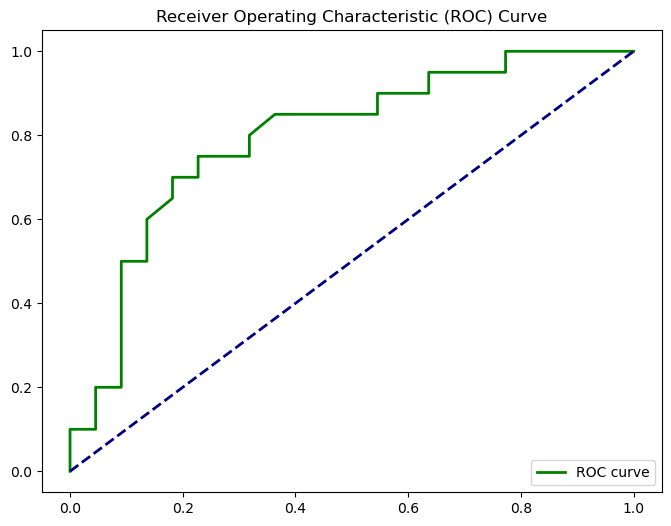

Confusion Matrix:
[[19  3]
 [ 8 12]]


In [144]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix


# Convert probabilities to binary predictions (0 or 1)
test_pred_class = (test_pred > 0.5).astype(int)

# Calculate and print accuracy
accuracy = accuracy_score(test_y, test_pred_class)
print(f'Accuracy: {accuracy:.4f}')
# Calculate and print ROC AUC
roc_auc = roc_auc_score(test_y, test_pred)
print(f'ROC AUC: {roc_auc:.4f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(test_y, test_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print confusion matrix
conf_matrix = confusion_matrix(test_y, test_pred_class)
print('Confusion Matrix:')
print(conf_matrix)

In [145]:
# Calculate and print precision, recall, and F1 score
precision = precision_score(test_y, test_pred_class)
recall = recall_score(test_y, test_pred_class)
f1 = f1_score(test_y, test_pred_class)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 0.8000
Recall: 0.6000
F1 Score: 0.6857


In [146]:
sm.delete_endpoint(EndpointName=xgboost_endpoint)

{'ResponseMetadata': {'RequestId': 'd36c9537-ff7b-4e7f-94ff-547c37544be1',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'd36c9537-ff7b-4e7f-94ff-547c37544be1',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '0',
   'date': 'Wed, 29 Nov 2023 11:21:06 GMT'},
  'RetryAttempts': 0}}